### **0. Set-up**

In [142]:
# Import libraries and utils
%run '../../utils.ipynb'

In [143]:
# Load NL predicted
raw_nl_pred = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/nl/f1.csv")

In [144]:
# Load EN predicted
raw_en_pred = pd.read_csv("../../../data/gpt-3.5-turbo-0125/processed/en/f1.csv")

# Drop rows in EN SimLex that are missing in NL SimLex
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'awful')].index)
raw_en_pred = raw_en_pred.drop(raw_en_pred[(raw_en_pred['word1'] == 'bad') & (raw_en_pred['word2'] == 'terrible')].index)

# Reset index
raw_en_pred = raw_en_pred.reset_index(drop=True)

In [145]:
# Show results
raw_nl_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,oud,nieuw,0.1,0.10,0.01,0.00,0.05,0.2,0.10,0.10,0.0,0.05,0.0,2.0,0.03,0.10,0.18
1,slim,intelligent,0.9,0.95,0.95,8.00,9.50,0.9,0.95,0.95,0.4,0.95,9.0,9.0,0.97,0.95,0.79
2,hard,moeilijk,0.4,0.20,0.10,2.00,2.00,0.1,0.05,0.20,0.1,0.10,2.0,3.0,0.00,0.05,0.39
3,gelukkig,vrolijk,0.8,0.80,0.80,6.00,8.50,0.7,0.85,0.85,0.6,0.80,8.0,8.0,0.83,0.80,0.76
4,hard,stoer,0.7,0.40,0.45,2.00,6.00,0.5,0.05,0.65,0.4,0.20,4.0,6.0,0.61,0.50,0.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,samenvoegen,verwerven,3.0,1.50,2.11,2.06,4.00,3.0,3.00,4.00,3.0,2.00,4.8,1.0,1.00,5.50,4.00
993,sturen,bijwonen,0.0,1.00,1.56,0.00,1.00,0.0,0.00,1.00,1.0,1.00,0.0,1.0,1.00,0.00,1.00
994,verzamelen,bijwonen,1.0,1.00,1.56,0.00,5.00,0.0,3.00,3.00,1.0,2.00,0.0,1.0,4.00,2.50,1.33
995,opnemen,intrekken,1.0,2.00,1.11,0.00,1.00,0.0,1.00,2.00,2.0,1.00,0.0,1.0,2.00,0.00,1.00


In [146]:
# Show results
raw_en_pred

,word1,word2,similarity_score_1,similarity_score_2,similarity_score_3,similarity_score_4,similarity_score_5,similarity_score_6,similarity_score_7,similarity_score_8,similarity_score_9,similarity_score_10,similarity_score_11,similarity_score_12,similarity_score_13,similarity_score_14,similarity_score_15
0,old,new,0.05,0.10,1.00,1.0,0.20,0.10,0.15,1.5,0.10,0.15,3.50,0.01,0.20,1.00,0.10
1,smart,intelligent,0.90,0.95,1.00,1.0,0.96,0.95,0.95,9.5,0.95,0.90,9.50,0.93,0.95,0.94,1.00
2,hard,difficult,0.90,0.80,0.71,1.0,0.92,0.90,0.90,8.0,0.85,0.80,7.00,0.85,0.85,0.97,0.85
3,happy,cheerful,0.80,0.80,0.90,0.0,0.70,0.75,0.80,8.5,0.85,0.80,8.00,0.81,0.70,0.86,0.90
4,hard,easy,0.10,0.10,0.10,0.0,0.16,0.05,0.20,2.0,0.20,0.20,2.00,0.15,0.10,0.22,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,join,acquire,2.00,4.00,3.50,0.3,0.60,0.75,3.00,2.5,4.50,0.50,0.45,0.70,5.00,0.50,0.31
993,send,attend,1.00,1.00,1.00,0.2,0.30,0.00,2.00,2.0,3.50,0.00,0.21,0.40,3.00,0.20,0.29
994,gather,attend,2.00,2.00,2.00,0.3,0.45,0.50,2.00,3.0,3.00,0.00,0.32,0.70,4.00,0.30,0.37
995,absorb,withdraw,1.00,1.00,1.50,0.1,0.20,0.00,1.00,1.5,1.50,0.00,0.20,0.30,2.00,0.10,0.16


### **1. Data Processing**

In [147]:
# Copy dataframe
nl_pred = raw_nl_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
nl_pred['nl_pred_sl'] = nl_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
nl_pred['nl_pred_sd'] = nl_pred[similarity_cols].std(axis=1).round(2)

# Select columns
nl_pred = nl_pred[['word1', 'word2', 'nl_pred_sl', 'nl_pred_sd']]

# Show results
nl_pred

,word1,word2,nl_pred_sl,nl_pred_sd
0,oud,nieuw,0.20,0.50
1,slim,intelligent,3.01,3.67
2,hard,moeilijk,0.71,0.99
3,gelukkig,vrolijk,2.61,3.18
4,hard,stoer,1.53,2.06
...,...,...,...,...
992,samenvoegen,verwerven,2.93,1.35
993,sturen,bijwonen,0.64,0.56
994,verzamelen,bijwonen,1.76,1.49
995,opnemen,intrekken,1.01,0.76


In [148]:
# Copy dataframe
en_pred = raw_en_pred.copy()

# List of columns to calculate mean SimLex-999
similarity_cols = [f"similarity_score_{i}" for i in range(1, 16)]

# Calculate the mean SimLex-999
en_pred['en_pred_sl'] = en_pred[similarity_cols].mean(axis=1).round(2)

# Calculate the standard deviation SimLex-999
en_pred['en_pred_sd'] = en_pred[similarity_cols].std(axis=1).round(2)

# Select columns
en_pred = en_pred[['word1', 'word2', 'en_pred_sl', 'en_pred_sd']]

# Show results
en_pred

,word1,word2,en_pred_sl,en_pred_sd
0,old,new,0.61,0.93
1,smart,intelligent,2.09,3.01
2,hard,difficult,1.75,2.34
3,happy,cheerful,1.74,2.65
4,hard,easy,0.38,0.66
...,...,...,...,...
992,join,acquire,1.91,1.70
993,send,attend,1.01,1.12
994,gather,attend,1.40,1.26
995,absorb,withdraw,0.70,0.68


In [149]:
# Concatenate NL and EN DataFrames
conc = pd.concat([nl_pred, en_pred], axis=1)

# Show results
conc

,word1,word2,nl_pred_sl,nl_pred_sd,word1,word2,en_pred_sl,en_pred_sd
0,oud,nieuw,0.20,0.50,old,new,0.61,0.93
1,slim,intelligent,3.01,3.67,smart,intelligent,2.09,3.01
2,hard,moeilijk,0.71,0.99,hard,difficult,1.75,2.34
3,gelukkig,vrolijk,2.61,3.18,happy,cheerful,1.74,2.65
4,hard,stoer,1.53,2.06,hard,easy,0.38,0.66
...,...,...,...,...,...,...,...,...
992,samenvoegen,verwerven,2.93,1.35,join,acquire,1.91,1.70
993,sturen,bijwonen,0.64,0.56,send,attend,1.01,1.12
994,verzamelen,bijwonen,1.76,1.49,gather,attend,1.40,1.26
995,opnemen,intrekken,1.01,0.76,absorb,withdraw,0.70,0.68


### **2. Descriptive Statistics**

In [150]:
# Summary statistics SimLex-999
nl_pred_sl_summary = round(nl_pred['nl_pred_sl'].describe(), 2)
en_pred_sl_summary = round(en_pred['en_pred_sl'].describe(), 2)

# Add median SimLex-999
nl_pred_sl_summary['median'] = round(nl_pred['nl_pred_sl'].median(), 2)
en_pred_sl_summary['median'] = round(en_pred['en_pred_sl'].median(), 2)

# Summary statistics standard deviations
nl_pred_sd_summary = round(nl_pred['nl_pred_sd'].describe(), 2)
en_pred_sd_summary = round(en_pred['en_pred_sd'].describe(), 2)

# Add median standard deviation
nl_pred_sd_summary['median'] = round(nl_pred['nl_pred_sd'].median(), 2)
en_pred_sd_summary['median'] = round(en_pred['en_pred_sd'].median(), 2)

# Create pandas DataFrame
summary_df = pd.DataFrame({
    "nl_pred_sl": nl_pred_sl_summary,
    "en_pred_sl": en_pred_sl_summary,
    "nl_pred_sd": nl_pred_sd_summary,
    "en_pred_sd": en_pred_sd_summary
})

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,997.00,997.00,997.00,997.00
mean,3.67,2.94,1.40,1.57
std,2.61,2.16,0.94,0.91
min,0.00,0.01,0.00,0.02
25%,1.41,1.12,0.72,0.91
50%,3.18,2.38,1.22,1.35
75%,5.97,4.56,1.97,2.15
max,9.80,9.24,4.50,4.35
median,3.18,2.38,1.22,1.35


#### **2.1. SimLex-999**

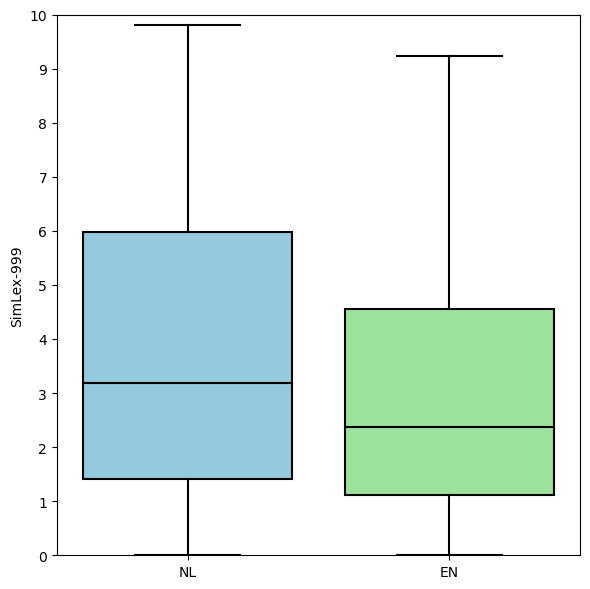

In [151]:
# Rename columns and copy
renamed_nl_pred_sl = nl_pred.rename(columns={"nl_pred_sl": "SimLex-999"}).copy()
renamed_en_pred_sl = en_pred.rename(columns={"en_pred_sl": "SimLex-999"}).copy()

# Create dummy label
renamed_nl_pred_sl['Score'] = 'NL'
renamed_en_pred_sl['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sl, renamed_en_pred_sl])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='SimLex-999',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('SimLex-999')
# plt.title('Comparison of SimLex-999')

# Customize y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 10)  # Setting y-axis limits from 0 to 10

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **2.2. Standard Deviation**

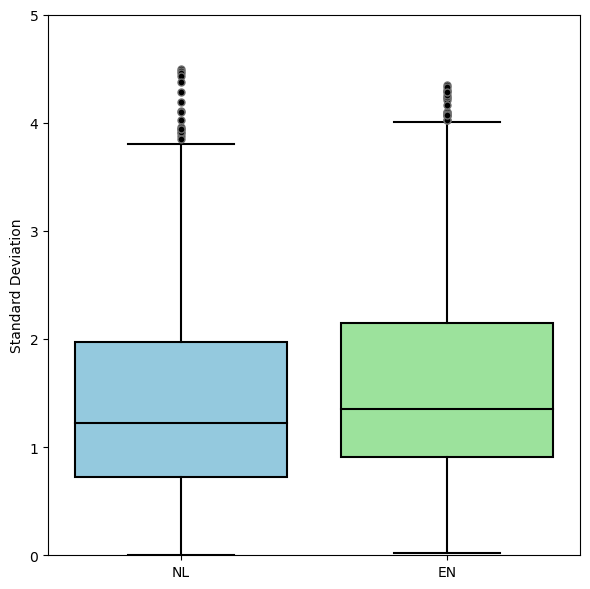

In [152]:
# Rename columns and copy
renamed_nl_pred_sd = nl_pred.rename(columns={"nl_pred_sd": "Standard Deviation"}).copy()
renamed_en_pred_sd = en_pred.rename(columns={"en_pred_sd": "Standard Deviation"}).copy()

# Create dummy label
renamed_nl_pred_sd['Score'] = 'NL'
renamed_en_pred_sd['Score'] = 'EN'

# Combine DataFrames
combined_data = pd.concat([renamed_nl_pred_sd, renamed_en_pred_sd])

# Create boxplot
plt.figure(figsize=(6, 6))
sns.boxplot(
    x='Score',
    y='Standard Deviation',
    data=combined_data,
    palette=['skyblue', 'lightgreen'],
    boxprops={'edgecolor': 'black'},
    whiskerprops={'color': 'black'},
    flierprops={'marker': 'o', 'color': 'black', 'markerfacecolor': 'black'},
    capprops={'color': 'black'},
    medianprops={'color': 'black'}
)

# Set labels and title
plt.ylabel('Standard Deviation')
# plt.title('Comparison of Standard Deviation')

# Customizing y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.ylim(0, 5)  # Setting y-axis limits from 0 to 5

# Remove x-axis label
plt.xlabel('')

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **3. Distributions**

#### **3.1. SimLex-999**

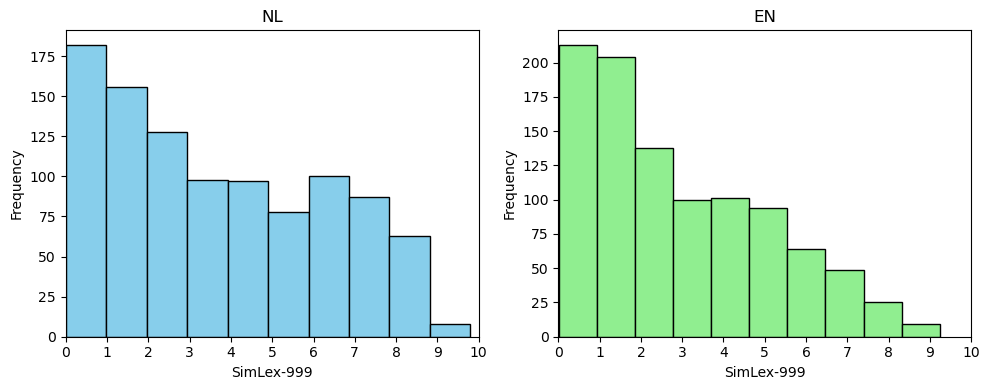

In [153]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10

# Define bins
bins = 10

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sl['SimLex-999'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

#### **3.2. Standard Deviation**

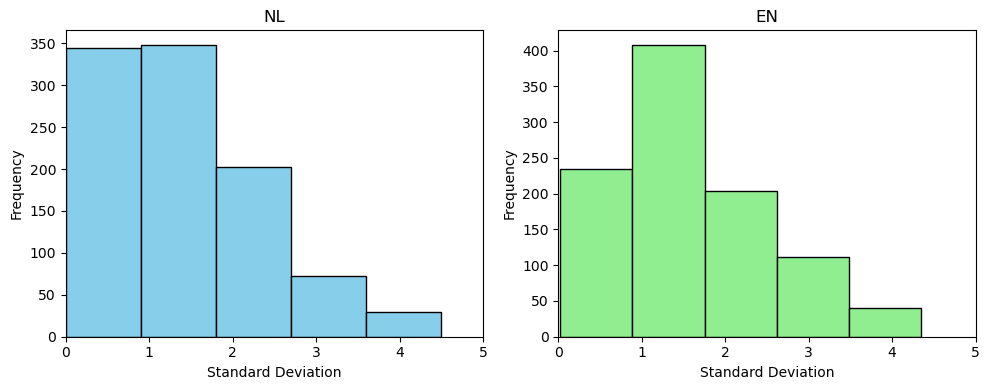

In [154]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 5

# Define bins
bins = 5

# Plot NL predicted histogram
axes[0].hist(renamed_nl_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='skyblue')
axes[0].set_title('NL')
axes[0].set_xlabel('Standard Deviation')
axes[0].set_ylabel('Frequency')
axes[0].set_xlim(x_min, x_max)
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[0].grid(False) # Remove grid

# Plot EN predicted histogram
axes[1].hist(renamed_en_pred_sd['Standard Deviation'], bins=bins, edgecolor='black', color='lightgreen')
axes[1].set_title('EN')
axes[1].set_xlabel('Standard Deviation')
axes[1].set_ylabel('Frequency')
axes[1].set_xlim(x_min, x_max)
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
axes[1].grid(False) # Remove grid

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

### **4. Outliers**

#### **4.1. NL**

In [155]:
# Count outliers
print_outlier_counts(nl_pred)

Outliers in nl_pred_sd: 17
No outliers found in columns: nl_pred_sl


In [156]:
# Row outliers
print_outlier_data(nl_pred, 'nl_pred_sd')


Outliers in nl_pred_sd:
           word1         word2  nl_pred_sl  nl_pred_sd
9         vreemd   eigenaardig        3.30        4.11
14   krankzinnig           gek        3.17        3.88
23   eigenaardig        vreemd        3.22        4.02
29    betaalbaar      goedkoop        3.30        4.10
95     elastisch      flexibel        6.14        3.96
109   echtgenote    echtgenoot        6.93        4.50
111    bruidegom         bruid        6.85        4.48
115          oom         tante        5.84        3.90
116        paard        merrie        6.06        4.19
117    onderkant     bovenkant        6.86        4.46
406        noord          west        5.03        3.94
690        beest          dier        6.12        3.91
709      verdrag  overeenkomst        6.06        3.85
883  bekendmaken   aankondigen        4.23        4.28
886  verkondigen   aankondigen        3.86        3.94
887    verwerven    verkrijgen        4.32        4.43
893  inspecteren    examineren        4.

#### **4.2. EN**

In [157]:
# Count outliers
print_outlier_counts(en_pred)

Outliers in en_pred_sd: 18
No outliers found in columns: en_pred_sl


In [158]:
# Row outliers
print_outlier_data(en_pred, 'en_pred_sd')


Outliers in en_pred_sd:
       word1       word2  en_pred_sl  en_pred_sd
109     wife     husband        5.21        4.23
111    groom       bride        5.28        4.29
113    south       north        5.34        4.35
115    uncle        aunt        5.27        4.30
116    horse        mare        5.08        4.10
117   bottom         top        5.24        4.33
119  student       pupil        5.08        4.10
123    woman         man        5.12        4.21
125  actress       actor        5.25        4.24
127    movie        film        5.04        4.07
132     area      region        4.97        4.06
136   sunset     sunrise        5.00        4.08
141     taxi         cab        5.01        4.02
517   violin  instrument        5.08        4.02
779    occur      happen        6.45        4.26
780   vanish   disappear        6.52        4.28
782    plead         beg        6.06        4.16
784  protect      defend        6.22        4.07


#### **4.3. Add to Summary**

In [159]:
# Calculate outliers
outliers_nl_pred_sl = calculate_outliers(nl_pred, 'nl_pred_sl')
outliers_nl_pred_sd = calculate_outliers(nl_pred, 'nl_pred_sd')
outliers_en_pred_sl = calculate_outliers(en_pred, 'en_pred_sl')
outliers_en_pred_sd = calculate_outliers(en_pred, 'en_pred_sd')

# Count outliers
count_outliers_nl_pred_sl = outliers_nl_pred_sl.shape[0]
count_outliers_nl_pred_sd = outliers_nl_pred_sd.shape[0]
count_outliers_en_pred_sl = outliers_en_pred_sl.shape[0]
count_outliers_en_pred_sd = outliers_en_pred_sd.shape[0]

# Add outliers count to summary
outliers_row = pd.Series([count_outliers_nl_pred_sl, count_outliers_en_pred_sl, count_outliers_nl_pred_sd, count_outliers_en_pred_sd], 
    index=summary_df.columns,
    name='outliers'
)
summary_df = pd.concat([summary_df, outliers_row.to_frame().T])

# Show results
summary_df

,nl_pred_sl,en_pred_sl,nl_pred_sd,en_pred_sd
count,997.00,997.00,997.00,997.00
mean,3.67,2.94,1.40,1.57
std,2.61,2.16,0.94,0.91
min,0.00,0.01,0.00,0.02
25%,1.41,1.12,0.72,0.91
50%,3.18,2.38,1.22,1.35
75%,5.97,4.56,1.97,2.15
max,9.80,9.24,4.50,4.35
median,3.18,2.38,1.22,1.35
outliers,0.00,0.00,17.00,18.00


### **5. Correlation**

#### **5.1. SimLex-999 vs Standard Deviation**

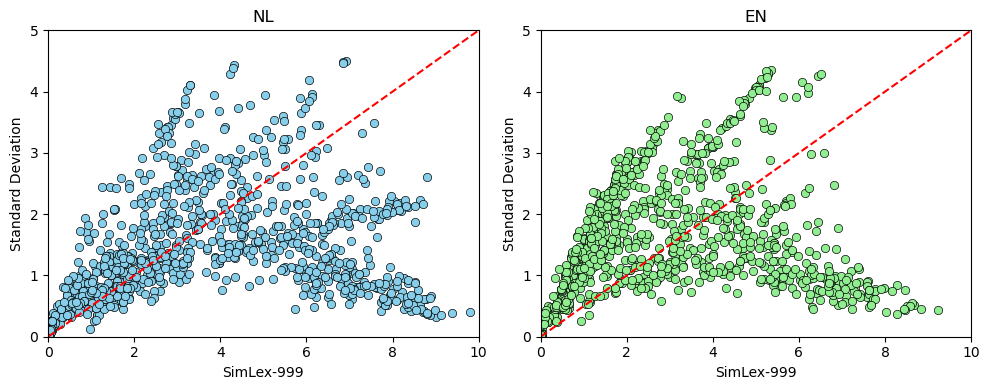

In [160]:
# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Define x-axis limits
x_min = 0
x_max = 10
y_min = 0
y_max = 5

# Create scatter plot
sns.scatterplot(x='nl_pred_sl', y='nl_pred_sd', data=nl_pred, ax=axes[0], color='skyblue', edgecolor='black')

# Plot diagonal line
axes[0].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[0].set_xlim(x_min, x_max)
axes[0].set_ylim(y_min, y_max)

# Set labels and title
axes[0].set_xlabel('SimLex-999')
axes[0].set_ylabel('Standard Deviation')
axes[0].set_title('NL')

# Remove grid
axes[0].grid(False)

# Create scatter plot
sns.scatterplot(x='en_pred_sl', y='en_pred_sd', data=en_pred, ax=axes[1], color='lightgreen', edgecolor='black')

# Plot diagonal line
axes[1].plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

# Set axis limits
axes[1].set_xlim(x_min, x_max)
axes[1].set_ylim(y_min, y_max)

# Set labels and title
axes[1].set_xlabel('SimLex-999')
axes[1].set_ylabel('Standard Deviation')
axes[1].set_title('EN')

# Remove grid
axes[1].grid(False)

# Adjust layout
plt.tight_layout()

# Show results
plt.show()

In [161]:
# List to store correlations
correlations_list = []

# Append correlations to list
correlations_list.append(calculate_correlation_and_pvalue(conc, 'nl_pred_sl', 'nl_pred_sd'))
correlations_list.append(calculate_correlation_and_pvalue(conc, 'en_pred_sl', 'en_pred_sd'))

# Convert list into Pandas DataFrame
correlation_df = pd.DataFrame(correlations_list)

# Show results
correlation_df

,simlex999,standard_deviation,correlation,p_value,significance
0,nl_pred_sl,nl_pred_sd,0.43155,1.736176e-46,significant
1,en_pred_sl,en_pred_sd,0.27284,1.769916e-18,significant


### **6. Evaluation Metrics**

#### **6.1. Spearmans's Rank Correlation**

##### **6.1.1. NL SimLex-999 vs EN SimLex-999**

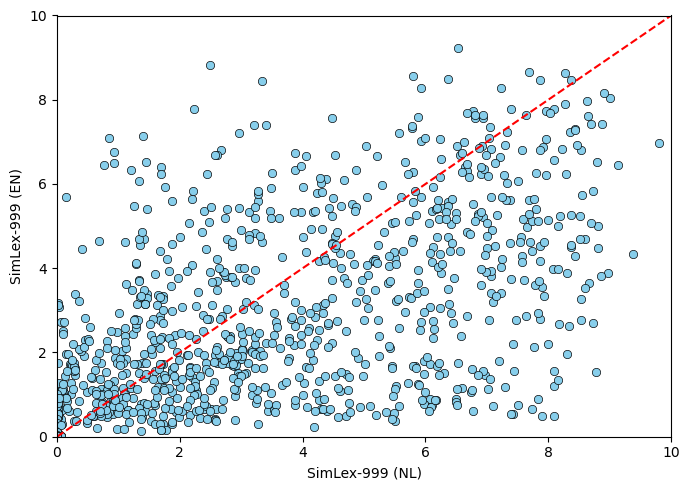

In [162]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sl', 'en_pred_sl', 'SimLex-999 (NL)', 'SimLex-999 (EN)', 0, 10, 0, 10)

In [163]:
# Correlation and pvalue
print_correlation_and_pvalue(conc, 'nl_pred_sl', 'en_pred_sl')

Spearman's Rank correlation: 0.56033
P-value: 1.722178007975012e-83
The correlation is statistically significant.



##### **6.1.2. NL Standard Deviation vs EN Standard Deviation**

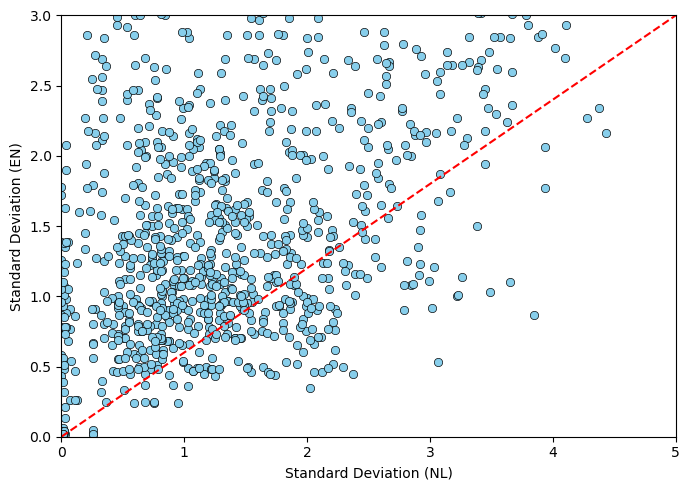

In [164]:
# Scatter plot
plot_scatter_plot(conc, 'nl_pred_sd', 'en_pred_sd', 'Standard Deviation (NL)', 'Standard Deviation (EN)', 0, 5, 0, 3)

In [165]:
# Correlation and p-value
print_correlation_and_pvalue(conc, 'nl_pred_sd', 'en_pred_sd')

Spearman's Rank correlation: 0.37148
P-value: 5.5745002993641535e-34
The correlation is statistically significant.



#### **7.2. Mean Square Error (MSE)**

In [166]:
# Calculate Mean Squared Error
mse = mean_squared_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 5.78


#### **7.3. Mean Absolute Error (MAE)**

In [167]:
# Calculate Mean Absolute Error
mae = mean_absolute_error(conc['nl_pred_sl'], conc['en_pred_sl'])

# Show results
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 1.81


#### **7.4. Bland-Altman**

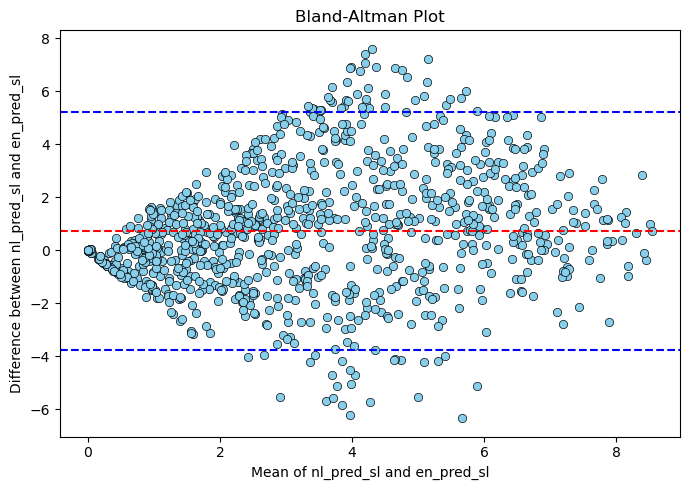

In [168]:
# SimLex-999
bland_altman_plot(data1=conc['nl_pred_sl'], data2=conc['en_pred_sl'])

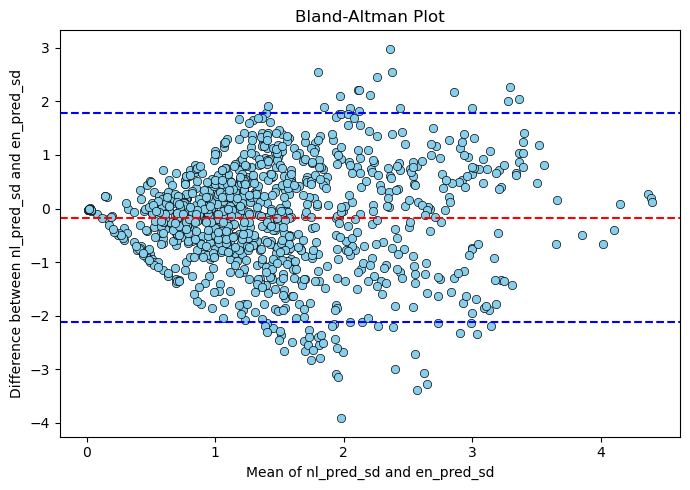

In [169]:
# Standard Deviation
bland_altman_plot(data1=conc['nl_pred_sd'], data2=conc['en_pred_sd'])